In [1]:
#%pip install axelrod
#!conda list freetype

In [2]:
import axelrod as axl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

### Setup parameters

In [3]:
players = [axl.TitForTat(), axl.FirstByTidemanAndChieruzzi(), axl.FirstByNydegger(), axl.FirstByGrofman(), axl.FirstByShubik(),
            axl.Grudger(), axl.FirstByDavis(), axl.FirstByGraaskamp(), axl.FirstByDowning(),
            axl.FirstByJoss(), axl.FirstByAnonymous(), axl.Random()]


num_players = len(players)
num_reps = 5
num_turns = 200

### Running the tournament

In [4]:
tournament = axl.Tournament(players=players, repetitions=num_reps, turns=num_turns)
results = tournament.play(build_results = True, filename="results.csv")

Analysing: 100%|██████████| 25/25 [00:01<00:00, 15.85it/s]


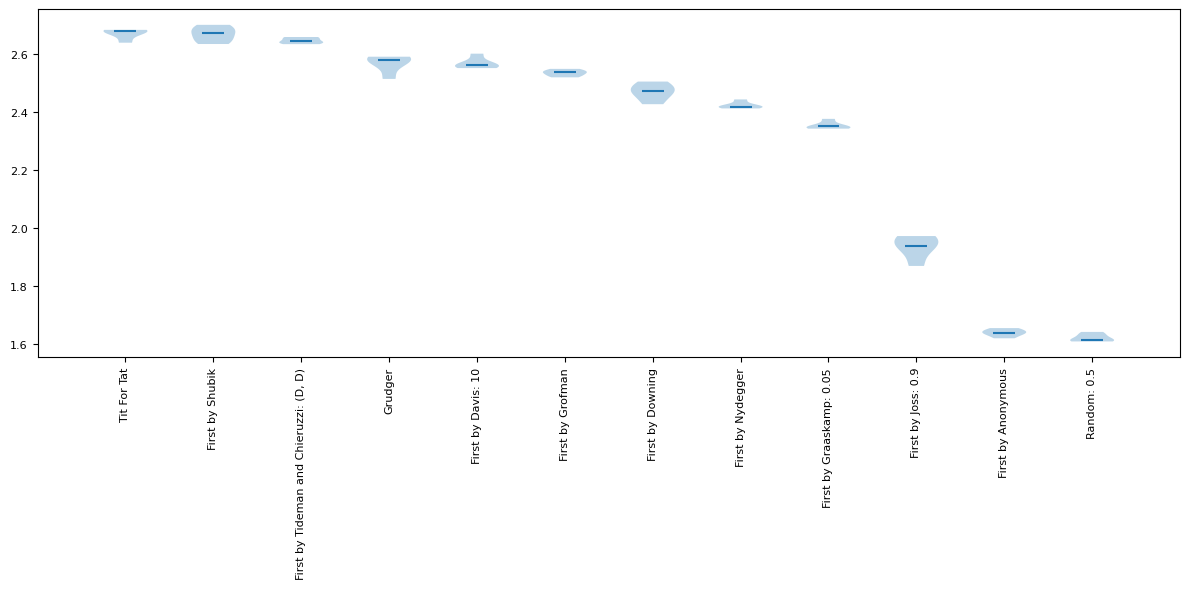

In [5]:
%matplotlib inline
plot = axl.Plot(results)
p = plot.boxplot()

In [6]:
results.write_summary("summary.csv")

In [7]:
results.scores

[[5891, 5802, 5869, 5898, 5899],
 [5811, 5802, 5791, 5840, 5845],
 [5305, 5319, 5316, 5325, 5373],
 [5604, 5584, 5540, 5557, 5579],
 [5873, 5792, 5904, 5825, 5937],
 [5670, 5528, 5694, 5696, 5648],
 [5621, 5610, 5635, 5719, 5639],
 [5152, 5170, 5169, 5155, 5226],
 [5508, 5437, 5466, 5337, 5406],
 [4264, 4114, 4255, 4340, 4331],
 [3600, 3625, 3644, 3567, 3608],
 [3557, 3615, 3546, 3589, 3543]]

In [8]:
results.normalised_scores

[[2.6777272727272727,
  2.637272727272727,
  2.6677272727272725,
  2.6809090909090907,
  2.6813636363636366],
 [2.641363636363636,
  2.637272727272727,
  2.6322727272727273,
  2.6545454545454543,
  2.6568181818181817],
 [2.411363636363636,
  2.4177272727272725,
  2.4163636363636365,
  2.4204545454545454,
  2.4422727272727274],
 [2.5472727272727274,
  2.5381818181818185,
  2.518181818181818,
  2.525909090909091,
  2.5359090909090907],
 [2.6695454545454544,
  2.632727272727273,
  2.6836363636363636,
  2.647727272727273,
  2.6986363636363637],
 [2.5772727272727276,
  2.5127272727272727,
  2.588181818181818,
  2.5890909090909093,
  2.5672727272727274],
 [2.555,
  2.5500000000000003,
  2.5613636363636365,
  2.5995454545454546,
  2.563181818181818],
 [2.341818181818182,
  2.35,
  2.3495454545454546,
  2.3431818181818183,
  2.3754545454545455],
 [2.5036363636363634,
  2.4713636363636367,
  2.4845454545454544,
  2.4259090909090912,
  2.4572727272727275],
 [1.9381818181818182,
  1.87,
  1.93409

In [9]:
results.payoffs[2] # this is a way to implement schulze method by match

[[3.0, 3.0, 3.0, 3.0, 3.0],
 [2.97, 2.97, 2.97, 2.97, 2.97],
 [3.0, 3.0, 3.0, 3.0, 3.0],
 [3.0, 3.0, 3.0, 3.0, 3.0],
 [3.0, 3.0, 3.0, 3.0, 3.0],
 [3.0, 3.0, 3.0, 3.0, 3.0],
 [3.0, 3.0, 3.0, 3.0, 3.0],
 [2.76, 2.775, 2.76, 2.79, 2.76],
 [0.075, 0.075, 0.075, 0.075, 0.075],
 [2.7, 2.76, 2.79, 2.66, 2.73],
 [1.55, 1.38, 1.415, 1.555, 1.56],
 [1.47, 1.635, 1.57, 1.575, 1.77]]

### Schulze method

#### Build pairwise wins matrix

In [10]:
pairwise_wins = np.zeros((num_players, num_players), dtype=float)

for strat_1 in range(num_players):
    for strat_2 in range(num_players):
        if strat_1 != strat_2:
            wins_1 = 0
            wins_2 = 0
            for rep in range(num_reps):
                score_1 = results.payoffs[strat_1][strat_2][rep]
                score_2 = results.payoffs[strat_2][strat_1][rep]
                if score_1 > score_2:
                    wins_1 += round((score_1-score_2) * num_turns)
            # Save score difference from strat_1 over strat_2 (if positive)
            pairwise_wins[strat_1][strat_2] = wins_1
        else:
            pairwise_wins[strat_1][strat_2] = np.nan    

print("Pairwise wins matrix:\n", pairwise_wins)

Pairwise wins matrix:
 [[  nan    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [  25.   nan   50.   30.   25.   25.   25.  190.  150.    0. 2145. 1985.]
 [   0.    0.   nan    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.   nan    0.    0.    0.  470.    0.    0.    0.    0.]
 [   0.    0.    0.    0.   nan    0.    0. 1430.    0.    0. 1535. 1615.]
 [   0.    0.    0.    0.    0.   nan    0.  665.   50.    0. 2520. 2400.]
 [   0.    0.    0.    0.    0.    0.   nan  660.    0.    0. 2285. 2425.]
 [   0.    0.  385.    0.    0.    0.    0.   nan  405.    0. 1745. 1800.]
 [   0.    0. 4825. 2825.   75.    0.  125.    0.   nan    0. 2490. 2470.]
 [  25.    5.  420.  415.   40.    5.   15.   75.  490.   nan  260.  245.]
 [  20.    0. 2480.  865.    0.    0.    0.    0.    0.    0.   nan  135.]
 [  10.    0. 2275.  715.    0.    0.    0.    0.    0.    0.   20.   nan]]


#### Apply Schulze method

In [11]:
def schulze_method(pairwise_matrix):
    n = len(pairwise_matrix)

    # Compute strongest paths
    for i in range(n):
        for j in range(n):
            if i != j:
                for k in range(n):
                    if i != k and j != k:
                        pairwise_matrix[j][k] = max(pairwise_matrix[j][k], min(pairwise_matrix[j][i], pairwise_matrix[i][k]))

    # Ranking: sort by scores difference in path strength
    ranking = sorted(range(n), key=lambda x: sum(pairwise_matrix[x][y] > pairwise_matrix[y][x] for y in range(n)), reverse=True)
    return ranking

schulze_ranking = schulze_method(pairwise_wins)
print("\nSchulze ranking:")
for pos, idx in enumerate(schulze_ranking, 1):
    print(f"{pos}. {players[idx]}")


Schulze ranking:
1. First by Joss: 0.9
2. First by Tideman and Chieruzzi: (D, D)
3. Grudger
4. First by Shubik
5. First by Davis: 10
6. First by Downing
7. First by Graaskamp: 0.05
8. First by Anonymous
9. Random: 0.5
10. First by Grofman
11. Tit For Tat
12. First by Nydegger


In [12]:
print(pairwise_wins)

[[  nan    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [  25.   nan 2145.  865.   75.   25.  125.  470.  405.    0. 2145. 1985.]
 [   0.    0.   nan    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [  20.    0.  470.   nan   75.    0.  125.  470.  405.    0.  470.  470.]
 [  20.    0. 1615.  865.   nan    0.  125. 1430.  405.    0. 1535. 1615.]
 [  20.    0. 2480.  865.   75.   nan  125.  665.  405.    0. 2520. 2400.]
 [  20.    0. 2285.  865.   75.    0.   nan  660.  405.    0. 2285. 2425.]
 [  20.    0. 1800.  865.   75.    0.  125.   nan  405.    0. 1745. 1800.]
 [  20.    0. 4825. 2825.   75.    0.  125.  470.   nan    0. 2490. 2470.]
 [  25.    5.  490.  490.   75.    5.  125.  470.  490.   nan  490.  490.]
 [  20.    0. 2480.  865.   75.    0.  125.  470.  405.    0.   nan  470.]
 [  20.    0. 2275.  715.   75.    0.  125.  470.  405.    0.  470.   nan]]


In [13]:
print(schulze_ranking)

[9, 1, 5, 4, 6, 8, 7, 10, 11, 3, 0, 2]


#### Schulze graph

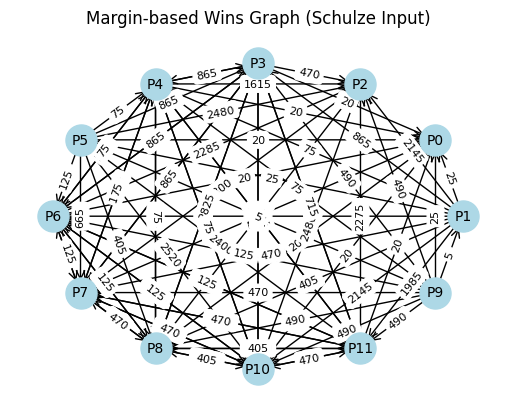


 Legend:
P0 - Tit For Tat
P1 - First by Tideman and Chieruzzi: (D, D)
P2 - First by Nydegger
P3 - First by Grofman
P4 - First by Shubik
P5 - Grudger
P6 - First by Davis: 10
P7 - First by Graaskamp: 0.05
P8 - First by Downing
P9 - First by Joss: 0.9
P10 - First by Anonymous
P11 - Random: 0.5


In [ ]:
def plot_margin_graph(pairwise_wins, labels=None):
    """
    Plot weighted directed graph for pairwise margins.
    Positive weight means row player beats column player by that margin.
    """
    n = pairwise_wins.shape[0]
    G = nx.DiGraph()

    if labels is None:
        labels = [f"S{i}" for i in range(n)]

    # Add edges with weight
    for i in range(n):
        for j in range(n):
            if i != j and pairwise_wins[i][j] > 0:
                G.add_edge(labels[i], labels[j], weight=int(pairwise_wins[i][j]))

    # Layout
    pos = nx.circular_layout(G)

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Draw edges with thickness proportional to margin
    edges = G.edges(data=True)
    widths = [max(1, w['weight'] / max(pairwise_wins.flatten()) * 10) for (_, _, w) in edges]
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=widths, arrowstyle='->', arrowsize=15)

    # Add labels showing margins
    edge_labels = {(u, v): f"{d['weight']}" for u, v, d in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Margin-based Wins Graph (Schulze Method)")
    plt.axis("off")
    plt.show()

# Example usage:
a = plot_margin_graph(pairwise_wins, labels=[f"P{i}" for i in range(pairwise_wins.shape[0])])
a
print("\n Legend:")
for idx in range (0,num_players):
    print(f"P{idx} - {players[idx]}")

### Ranking comparasion

In [15]:
print("\nAxelrod classic ranking:")
for idx in range (0,num_players):
    print(f"{idx+1}. {results.ranked_names[idx]}")

print("\nSchulze ranking:")
for pos, idx in enumerate(schulze_ranking, 1):
    print(f"{pos}. {players[idx]}")


Axelrod classic ranking:
1. Tit For Tat
2. First by Shubik
3. First by Tideman and Chieruzzi: (D, D)
4. Grudger
5. First by Davis: 10
6. First by Grofman
7. First by Downing
8. First by Nydegger
9. First by Graaskamp: 0.05
10. First by Joss: 0.9
11. First by Anonymous
12. Random: 0.5

Schulze ranking:
1. First by Joss: 0.9
2. First by Tideman and Chieruzzi: (D, D)
3. Grudger
4. First by Shubik
5. First by Davis: 10
6. First by Downing
7. First by Graaskamp: 0.05
8. First by Anonymous
9. Random: 0.5
10. First by Grofman
11. Tit For Tat
12. First by Nydegger


In [ ]:
classic_ranking = []  # list to match structure of schulze ranking
summary_df = pd.read_csv("summary.csv")
for i in range(num_players):
    classic_ranking.append(int(summary_df['Original_index'][i]))

In [66]:
schulze_ranking

[9, 1, 5, 4, 6, 8, 7, 10, 11, 3, 0, 2]

In [67]:
classic_ranking

[0, 4, 1, 5, 6, 3, 8, 2, 7, 9, 10, 11]

### Some data analysis

In [62]:
df = pd.read_csv("results.csv")

In [63]:
df.columns

Index(['Interaction index', 'Player index', 'Opponent index', 'Repetition',
       'Player name', 'Opponent name', 'Actions', 'Score', 'Score difference',
       'Turns', 'Score per turn', 'Score difference per turn', 'Win',
       'Initial cooperation', 'Cooperation count', 'CC count', 'CD count',
       'DC count', 'DD count', 'CC to C count', 'CC to D count',
       'CD to C count', 'CD to D count', 'DC to C count', 'DC to D count',
       'DD to C count', 'DD to D count', 'Good partner'],
      dtype='object')